In [1]:
# 预处理数据
import pandas as pd

# Define column names based on the Boston Housing dataset attributes
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the data from the file
data = pd.read_csv('../data/housing.data.txt', delim_whitespace=True, header=None)

# Assign column names to the dataframe
data.columns = column_names

# Save the dataframe to a CSV file
data.to_csv('boston_housing.csv', index=False)

# Print the dataframe
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

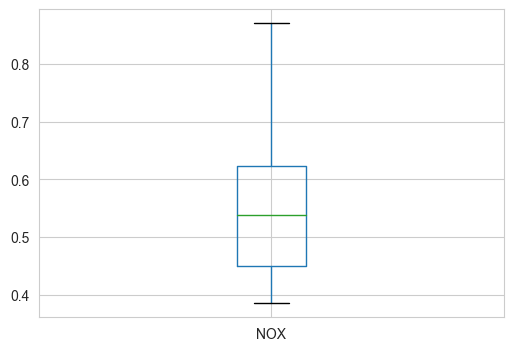

In [31]:
# 绘制箱线图
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 绘制某一列的箱线图
plt.figure(figsize=(6, 4))
df.boxplot(column=df.columns[4])
plt.show()

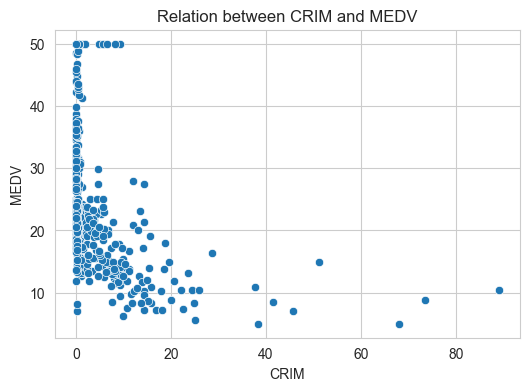

In [41]:
# 绘制散点图
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv('boston_housing.csv')

column = df.columns[0]
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df[column], y=df['MEDV'])
plt.title(f'Relation between {column} and MEDV')
plt.xlabel(column)
plt.ylabel('MEDV')
plt.show()


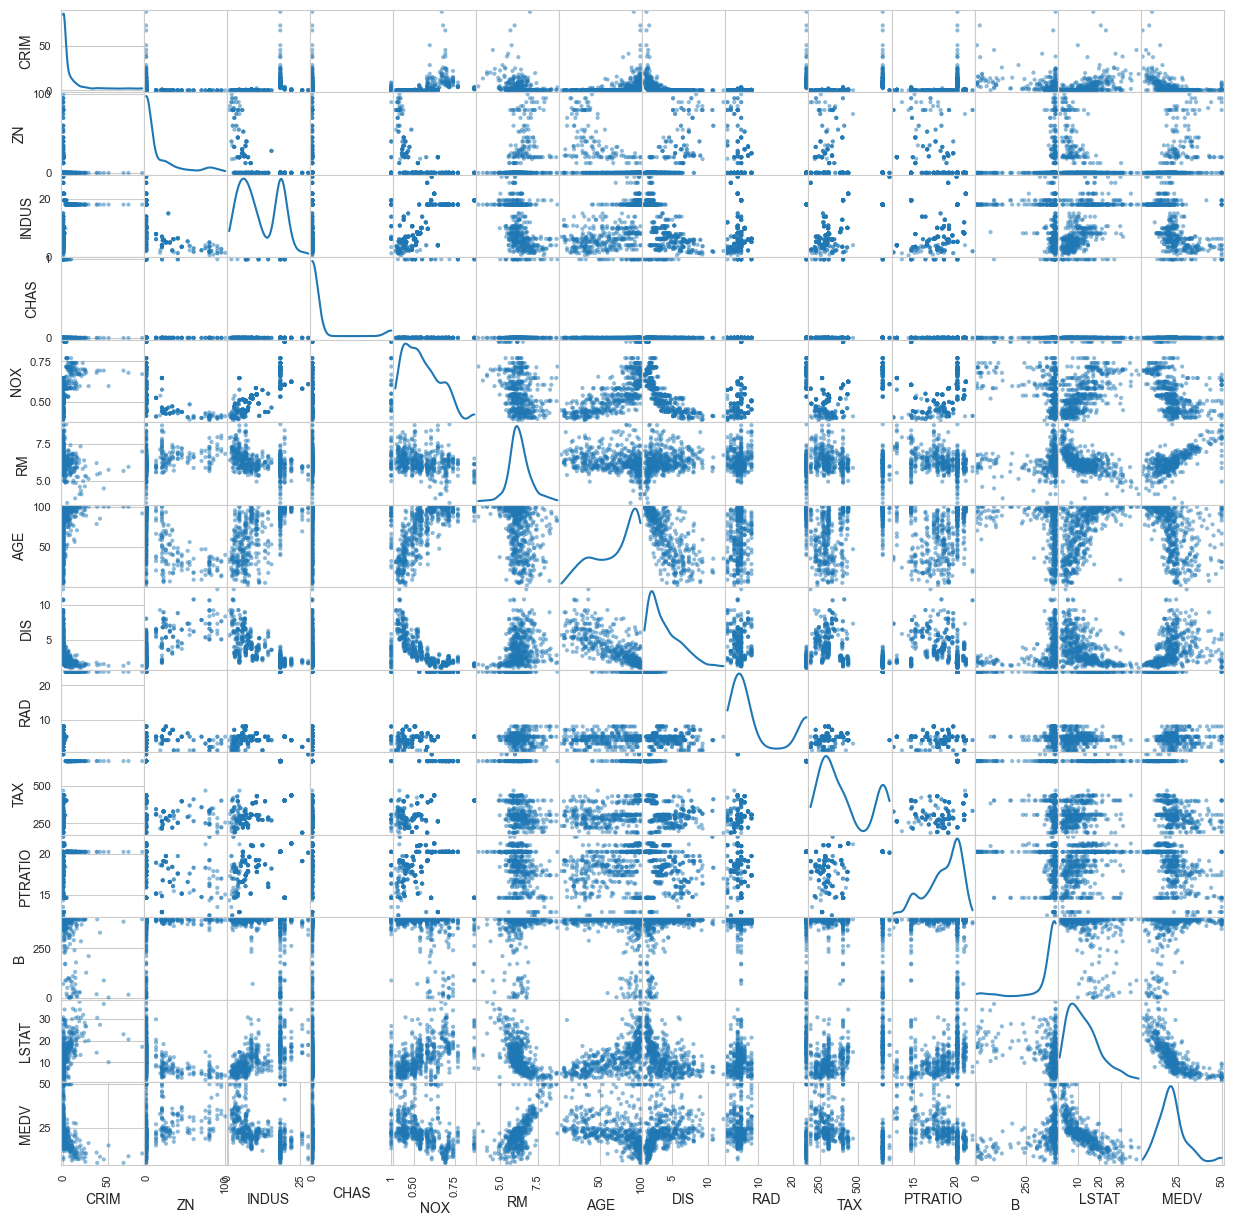

In [39]:
# 绘制矩阵图

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 绘制散点图矩阵
scatter_matrix(df, figsize=(15, 15), diagonal='kde')

# 显示图形
plt.show()

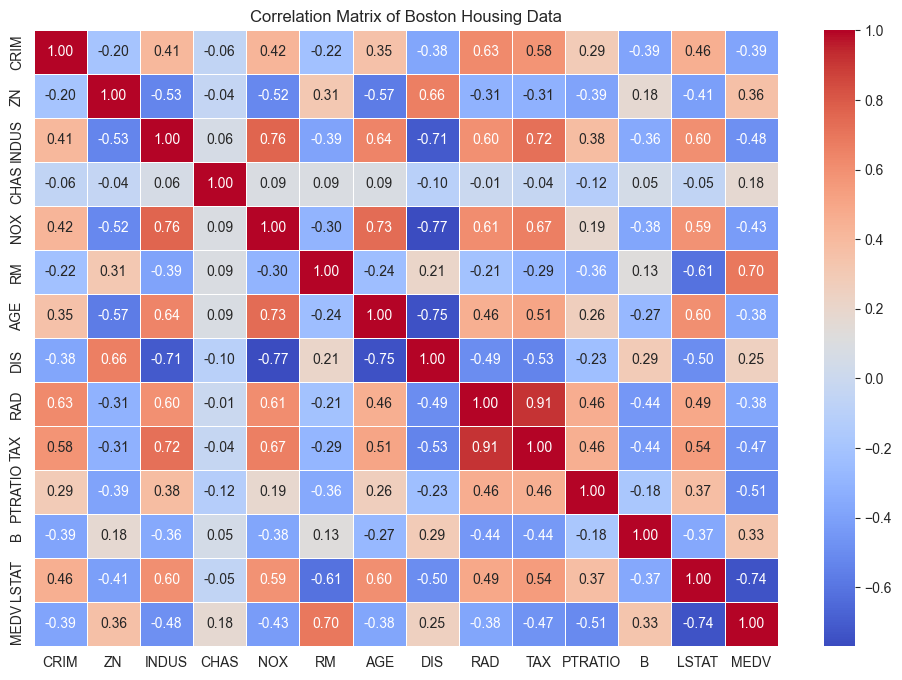

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 计算相关系数矩阵
corr_matrix = df.corr()

# 设置图形大小
plt.figure(figsize=(12, 8))

# 使用seaborn绘制热力图
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 设置标题
plt.title('Correlation Matrix of Boston Housing Data')

# 显示图形
plt.show()


Features with strong correlation to MEDV:
RM               0.695360
PTRATIO         -0.507787
LSTAT           -0.737663
INDUS PTRATIO   -0.520981
INDUS LSTAT     -0.652379
NOX PTRATIO     -0.579499
NOX LSTAT       -0.700705
RM^2             0.718169
RM B             0.581063
RM LSTAT        -0.729524
AGE LSTAT       -0.670859
RAD LSTAT       -0.553326
TAX PTRATIO     -0.508820
TAX LSTAT       -0.675416
PTRATIO^2       -0.510658
PTRATIO LSTAT   -0.750410
B LSTAT         -0.527663
LSTAT^2         -0.622179
MEDV             1.000000
Name: MEDV, dtype: float64


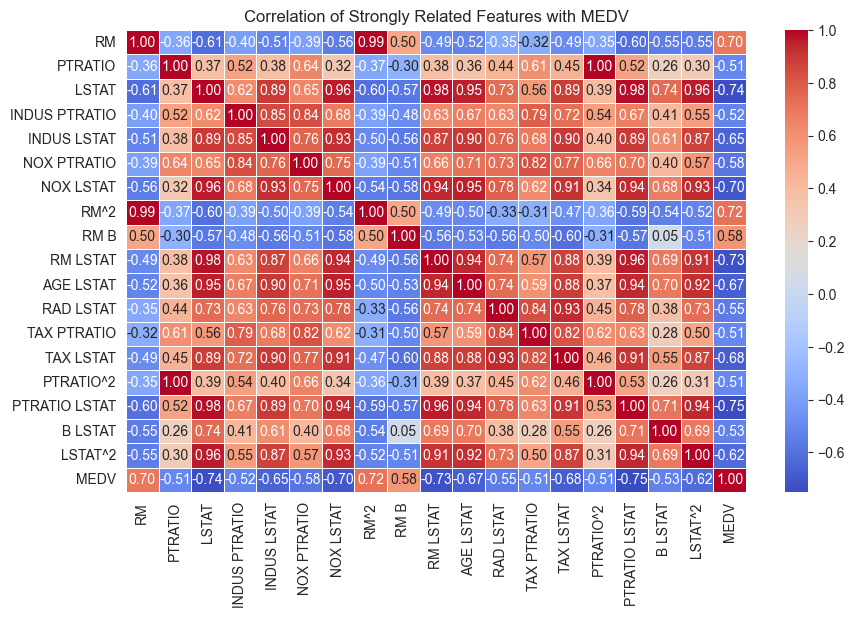

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 分离输入特征和目标变量
X = df.drop('MEDV', axis=1)  # 输入特征
y = df['MEDV']  # 目标变量

# 进行多项式特征扩展，degree=2 表示最高次项为2次
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 获取扩展后的特征名称
poly_features = poly.get_feature_names_out(X.columns)

# 将扩展后的特征转换为DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

# 将目标变量添加到多项式特征中
X_poly_df['MEDV'] = y

# 计算相关系数矩阵
corr_matrix = X_poly_df.corr()

# 筛选出与 MEDV 相关性较强的特征（绝对值大于 0.5 的）
strong_corr = corr_matrix['MEDV'][corr_matrix['MEDV'].abs() > 0.5]

# 打印与 MEDV 相关性较强的特征
print("Features with strong correlation to MEDV:")
print(strong_corr)

# 可视化相关性较强的特征
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[strong_corr.index, strong_corr.index], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Strongly Related Features with MEDV')
plt.show()


Features with strong correlation to MEDV:
RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


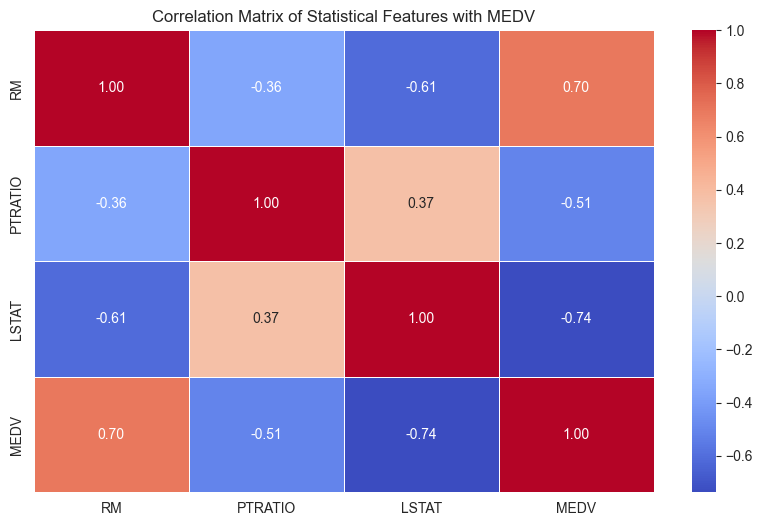

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('boston_housing.csv')

# 生成统计特征
# 计算每行（样本）的均值、标准差、最大值、最小值
df['mean_feature'] = df.mean(axis=1)
df['std_feature'] = df.std(axis=1)
df['max_feature'] = df.max(axis=1)
df['min_feature'] = df.min(axis=1)

# 计算新生成的统计特征与目标变量的相关系数
corr_matrix = df.corr()

# 筛选出与 MEDV 相关性较强的特征（绝对值大于 0.5 的）
strong_corr = corr_matrix['MEDV'][corr_matrix['MEDV'].abs() > 0.5]

# 打印相关性较强的特征
print("Features with strong correlation to MEDV:")
print(strong_corr)

# 可视化相关性较强的特征
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix.loc[strong_corr.index, strong_corr.index], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Statistical Features with MEDV')
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('boston_housing.csv', delim_whitespace=True, header=None)
# data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 分离特征和标签
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 预测测试集
y_pred = lr.predict(X_test)

# 计算MSE和RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 打印模型评估指标
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', lr.score(X_test, y_test))


ValueError: Found array with 0 feature(s) (shape=(405, 0)) while a minimum of 1 is required by LinearRegression.